In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

C:\Users\Acer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\Acer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [3]:
# Replace 'your_file_name.csv' with the path to your actual CSV file
df = pd.read_csv('Plane Price.csv')

num_observations = len(df)
print(f"Number of observations: {num_observations}")

# Display the first few rows of the DataFrame
df.head()

Number of observations: 517


,Model Name,Engine Type,HP or lbs thr ea engine,Max speed Knots,Rcmnd cruise Knots,Stall Knots dirty,Fuel gal/lbs,All eng rate of climb,Eng out rate of climb,Takeoff over 50ft,Landing over 50ft,Empty weight lbs,Length ft/in,Wing span ft/in,Range N.M.,Price
0,100 Darter (S.L. Industries),Piston,145,104,91.0,46.0,36,450,900.0,1300.0,"2,050","1,180",25/3,37/5,370,1300000.0
1,7 CCM Champ,Piston,85,89,83.0,44.0,15,600,720.0,800.0,"1,350",820,20/7,36/1,190,1230000.0
2,100 Darter (S.L. Industries),Piston,90,90,78.0,37.0,19,650,475.0,850.0,"1,300",810,21/5,35/0,210,1600000.0
3,7 AC Champ,Piston,85,88,78.0,37.0,19,620,500.0,850.0,"1,300",800,21/5,35/0,210,1300000.0
4,100 Darter (S.L. Industries),Piston,65,83,74.0,33.0,14,370,632.0,885.0,"1,220",740,21/5,35/0,175,1250000.0


In [4]:
# Cleaning the data: Removing rows with NA values and capitalizing the first letter of each word in 'Engine Type'
# Removing rows with any NA values
df = df.dropna()

# Capitalizing the first letter of each word in 'Engine Type' safely
df.loc[:, 'Engine Type'] = df['Engine Type'].str.title()

num_observations = len(df)
print(f"Number of observations: {num_observations}")

# Displaying the first few rows to verify the changes
print(df.head())

Number of observations: 421
                     Model Name Engine Type HP or lbs thr ea engine  \
0  100 Darter (S.L. Industries)      Piston                     145   
1                   7 CCM Champ      Piston                      85   
2  100 Darter (S.L. Industries)      Piston                      90   
3                    7 AC Champ      Piston                      85   
4  100 Darter (S.L. Industries)      Piston                      65   

  Max speed Knots  Rcmnd cruise Knots  Stall Knots dirty  Fuel gal/lbs  \
0             104                91.0               46.0            36   
1              89                83.0               44.0            15   
2              90                78.0               37.0            19   
3              88                78.0               37.0            19   
4              83                74.0               33.0            14   

  All eng rate of climb  Eng out rate of climb  Takeoff over 50ft  \
0                   450        

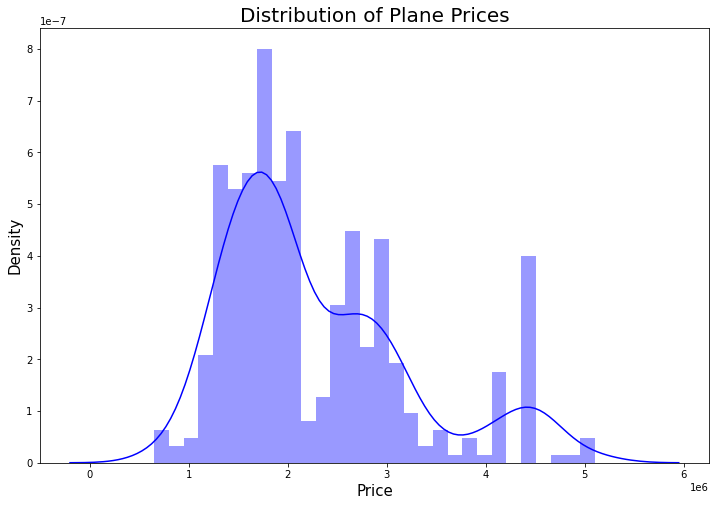

In [5]:
# Setting the aesthetic style of the plots
plt.figure(figsize=(12, 8))
sns.distplot(df['Price'], kde=True, color='blue', bins=30)
plt.title('Distribution of Plane Prices', fontsize=20)
plt.xlabel('Price', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.show()

Engine Type: Piston, Mean: 1910045.67, Quartiles: [1502500. 1810000. 2145000.]
Engine Type: Propjet, Mean: 2980620.51, Quartiles: [2741000. 3000000. 3180000.]
Engine Type: Jet, Mean: 4356808.51, Quartiles: [4100000. 4500000. 4500000.]


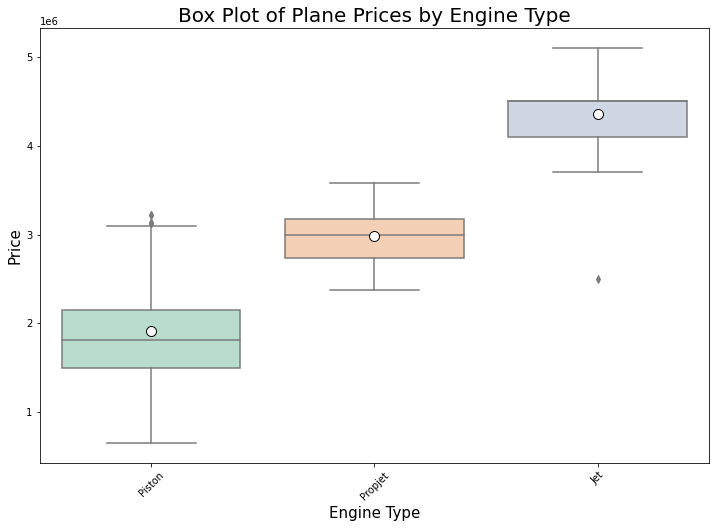

In [6]:
# Creating the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Engine Type', y='Price', data=df, palette='Pastel2', showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"})

# Calculating and printing mean and quartiles for demonstration
for engine_type in df['Engine Type'].unique():
    subset = df[df['Engine Type'] == engine_type]['Price']
    mean = subset.mean()
    quartiles = np.percentile(subset, [25, 50, 75])
    print(f"Engine Type: {engine_type}, Mean: {mean:.2f}, Quartiles: {quartiles}")

# Adding title and labels
plt.title('Box Plot of Plane Prices by Engine Type', fontsize=20)
plt.xlabel('Engine Type', fontsize=15)
plt.ylabel('Price', fontsize=15)

plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()

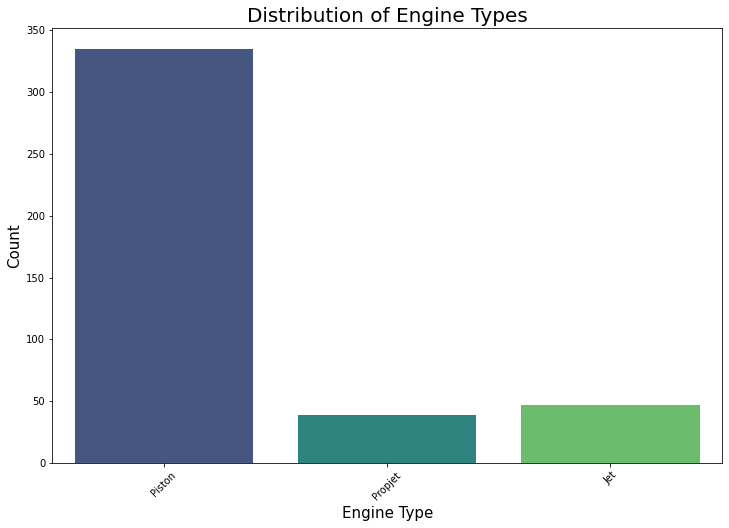

In [7]:
# Assuming df is your cleaned DataFrame
plt.figure(figsize=(12, 8))
sns.countplot(x='Engine Type', data=df, palette='viridis')

# Adding title and labels for clarity
plt.title('Distribution of Engine Types', fontsize=20)
plt.xlabel('Engine Type', fontsize=15)
plt.ylabel('Count', fontsize=15)

plt.xticks(rotation=45)  # This will rotate the x-axis labels for better readability

plt.show()

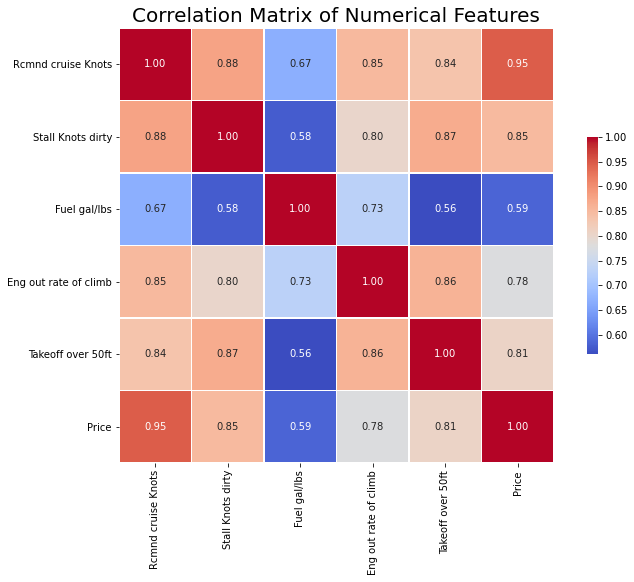

In [8]:
# Calculate the correlation matrix
corr = df.select_dtypes(include=['float64', 'int64']).corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm',
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Matrix of Numerical Features', fontsize=20)
plt.show()

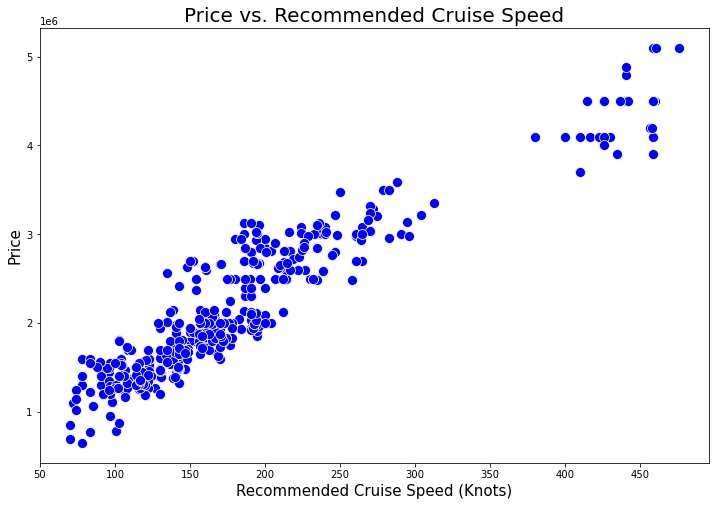

In [9]:
# Assuming 'Rcmnd cruise Knots' is correctly formatted as a numerical column
# If not, you might need to convert it using pd.to_numeric(df['Rcmnd cruise Knots'], errors='coerce')

plt.figure(figsize=(12, 8))
sns.scatterplot(x='Rcmnd cruise Knots', y='Price', data=df, color='blue', s=100)  # s is the marker size

plt.title('Price vs. Recommended Cruise Speed', fontsize=20)
plt.xlabel('Recommended Cruise Speed (Knots)', fontsize=15)
plt.ylabel('Price', fontsize=15)

plt.show()

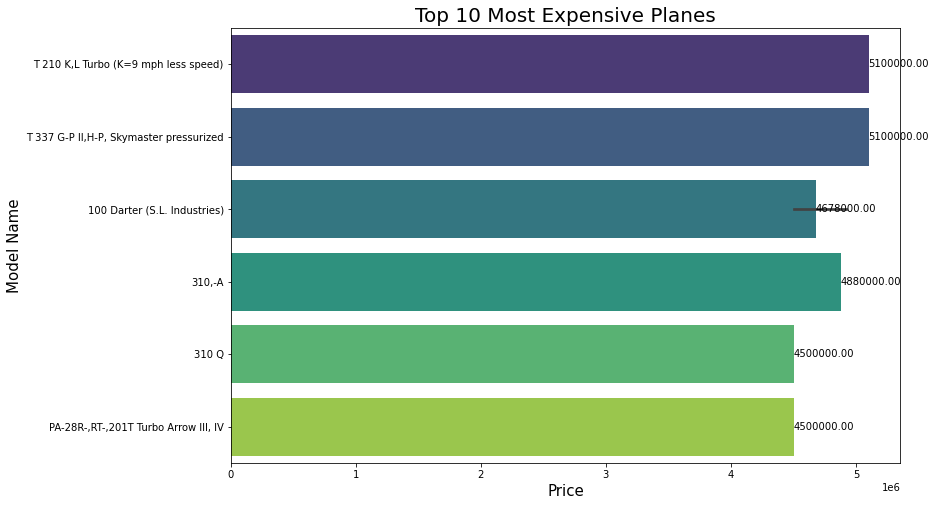

In [10]:
# Sort the DataFrame by 'Price' in descending order and select the top 10
top_10_expensive_planes = df.sort_values(by='Price', ascending=False).head(10)

# Creating the bar chart
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='Price', y='Model Name', data=top_10_expensive_planes, palette='viridis')

# Adding title and labels
plt.title('Top 10 Most Expensive Planes', fontsize=20)
plt.xlabel('Price', fontsize=15)
plt.ylabel('Model Name', fontsize=15)

# Adding price labels to the bars
for p in barplot.patches:
    width = p.get_width()    # Get the width of the bar
    plt.text(p.get_width(), p.get_y() + p.get_height() / 2,
             f'{width:.2f}',  # Format the price with 2 decimal places
             va='center')  # Center alignment


plt.show()

In [11]:
# Define features based on numeric predictors
features = ['HP or lbs thr ea engine', 'Max speed Knots', 'Rcmnd cruise Knots', 'Stall Knots dirty', 'Fuel gal/lbs', 'All eng rate of climb', 'Eng out rate of climb', 'Takeoff over 50ft', 'Landing over 50ft', 'Empty weight lbs', 'Range N.M.']


# Convert features to numeric, handling errors and filling NaNs
X = df[features].apply(pd.to_numeric, errors='coerce').fillna(0)
y = df['Price'].copy()

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Adding a constant to the model (for the intercept)
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

# Creating and fitting the model on the training set
model = sm.OLS(y_train, X_train_const).fit()

# Print the summary of the model fitted on the training data
print(model.summary())

# Making predictions on the test set
y_pred = model.predict(X_test_const)

# Comparing actual vs predicted values, you might want to use metrics such as R-squared, RMSE, etc.
# For simplicity here, let's calculate the R-squared value on the test data manually
ss_res = sum((y_test - y_pred) ** 2)
ss_tot = sum((y_test - y_test.mean()) ** 2)
r_squared_test = 1 - (ss_res / ss_tot)

print(f'Test R-squared: {r_squared_test:.3f}')

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     311.2
Date:                Wed, 06 Mar 2024   Prob (F-statistic):          6.96e-165
Time:                        12:42:31   Log-Likelihood:                -4693.0
No. Observations:                 336   AIC:                             9410.
Df Residuals:                     324   BIC:                             9456.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    1

C:\Users\Acer\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\Acer\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


In [12]:
# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

                    feature        VIF
0   HP or lbs thr ea engine   4.536524
1           Max speed Knots  36.218933
2        Rcmnd cruise Knots  55.288256
3         Stall Knots dirty  63.785983
4              Fuel gal/lbs   2.640118
5     All eng rate of climb   1.908692
6     Eng out rate of climb  33.625350
7         Takeoff over 50ft  45.737453
8         Landing over 50ft   1.227440
9          Empty weight lbs   1.162472
10               Range N.M.   3.341501


In [13]:
# Create a Lasso model with cross-validation to select the best alpha
lasso_cv = LassoCV(cv=5, random_state=42, max_iter=10000)

# Standardizing features and fitting LassoCV
pipeline = make_pipeline(StandardScaler(), lasso_cv)
pipeline.fit(X_train, y_train)

# Check the coefficients
lasso_coef = pipeline.named_steps['lassocv'].coef_
print("Lasso Coefficients:", lasso_coef)

# Identify non-zero coefficients (selected features)
selected_features = [features[i] for i, coef in enumerate(lasso_coef) if coef != 0]
print("Selected Features by Lasso:", selected_features)

Lasso Coefficients: [ 41999.06916244      0.         901846.74727144  39125.43840936
 -39248.95786047 -60106.60667679     -0.              0.
 -22913.26788297  49667.65752034  43716.83112464]
Selected Features by Lasso: ['HP or lbs thr ea engine', 'Rcmnd cruise Knots', 'Stall Knots dirty', 'Fuel gal/lbs', 'All eng rate of climb', 'Landing over 50ft', 'Empty weight lbs', 'Range N.M.']


In [14]:
# Assuming `df` is your DataFrame and `y` is already defined as df['Price']
selected_features = ['HP or lbs thr ea engine', 'Rcmnd cruise Knots', 'Stall Knots dirty', 'Fuel gal/lbs', 'All eng rate of climb', 'Landing over 50ft', 'Empty weight lbs', 'Range N.M.']

# Filter `X` for the selected features
X_selected = df[selected_features].apply(pd.to_numeric, errors='coerce').fillna(0)


# Adding a constant to the model (for the intercept)
X_selected_const = sm.add_constant(X_selected)

# Creating and fitting the model
model_selected = sm.OLS(y, X_selected_const).fit()

# Printing the summary of the model
print(model_selected.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     525.8
Date:                Wed, 06 Mar 2024   Prob (F-statistic):          6.99e-211
Time:                        12:42:34   Log-Likelihood:                -5884.0
No. Observations:                 421   AIC:                         1.179e+04
Df Residuals:                     412   BIC:                         1.182e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    3

C:\Users\Acer\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


In [15]:
# Assuming 'selected_features_by_lasso' were those retained by Lasso with non-zero coefficients
selected_features_by_lasso = ['HP or lbs thr ea engine', 'Rcmnd cruise Knots', 'Fuel gal/lbs', 'All eng rate of climb', 'Range N.M.']

# If you had used OLS to identify features with p-values less than 0.1 and wanted to combine this insight with Lasso's selection
# For demonstration, let's assume the same features identified by Lasso are considered significant based on p-value criteria
selected_features_by_p_value = selected_features_by_lasso

# Now, you can proceed with scaling and Ridge regression as initially intended
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[selected_features_by_p_value])
X_test_scaled = scaler.transform(X_test[selected_features_by_p_value])

ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train_scaled, y_train)

y_pred_ridge = ridge_reg.predict(X_test_scaled)
r2_score_ridge = r2_score(y_test, y_pred_ridge)
print(f'Ridge Regression R-squared on Test Set: {r2_score_ridge:.3f}')


Ridge Regression R-squared on Test Set: 0.909


In [16]:
# Define a new list of selected features based on significance (p-value < 0.05) and excluding those contributing to multicollinearity
selected_features_adjusted = ['HP or lbs thr ea engine', 'Rcmnd cruise Knots', 'Fuel gal/lbs', 'All eng rate of climb', 'Landing over 50ft', 'Empty weight lbs', 'Range N.M.']

# Preparing the data with the adjusted set of features
X_adjusted = X[selected_features_adjusted]
X_train_adjusted, X_test_adjusted, y_train, y_test = train_test_split(X_adjusted, y, test_size=0.2, random_state=42)

X_train_adjusted_const = sm.add_constant(X_train_adjusted)
X_test_adjusted_const = sm.add_constant(X_test_adjusted)

# Creating and fitting the model with adjusted features
model_adjusted = sm.OLS(y_train, X_train_adjusted_const).fit()

# Printing the summary of the adjusted model
print(model_adjusted.summary())

# Making predictions and calculating R-squared for the adjusted model
y_pred_adjusted = model_adjusted.predict(X_test_adjusted_const)
r_squared_test_adjusted = 1 - sum((y_test - y_pred_adjusted) ** 2) / sum((y_test - y_test.mean()) ** 2)

print(f'Adjusted Model Test R-squared: {r_squared_test_adjusted:.3f}')


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     491.2
Date:                Wed, 06 Mar 2024   Prob (F-statistic):          1.20e-169
Time:                        12:42:35   Log-Likelihood:                -4694.2
No. Observations:                 336   AIC:                             9404.
Df Residuals:                     328   BIC:                             9435.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    2

C:\Users\Acer\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\Acer\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


In [25]:
# Recreate dummy variables for "Engine Type" without dropping any category
engine_type_dummies = pd.get_dummies(df['Engine Type'], prefix='EngineType', drop_first=False)

# Concatenate the dummy variables with the original DataFrame, excluding the "Engine Type" column
df_with_dummies = pd.concat([df.drop('Engine Type', axis=1), engine_type_dummies], axis=1)

# Define the updated list of features including all dummy variables for engine types
features_updated = [
    'HP or lbs thr ea engine', 'Max speed Knots', 'Rcmnd cruise Knots', 
    'Stall Knots dirty', 'Fuel gal/lbs', 'All eng rate of climb', 
    'Eng out rate of climb', 'Takeoff over 50ft', 'Landing over 50ft', 
    'Empty weight lbs', 'Range N.M.', 
    'EngineType_Jet', 'EngineType_Piston', 'EngineType_Propjet'
]


In [26]:
# Convert feature columns to numeric type explicitly
for col in features_updated:
    df_with_dummies[col] = pd.to_numeric(df_with_dummies[col], errors='coerce')

# Fill any NaNs that may have been introduced by coercion
df_with_dummies.fillna(0, inplace=True)

# Prepare the data again
X = df_with_dummies[features_updated]
y = df_with_dummies['Price']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Adding a constant to the model (for the intercept)
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

# Creating and fitting the model with the updated features
model = sm.OLS(y_train, X_train_const).fit()

# Print the summary of the model fitted on the training data
print(model.summary())

# Making predictions on the test set and evaluating
y_pred = model.predict(X_test_const)
r_squared_test = r2_score(y_test, y_pred)

print(f'Test R-squared: {r_squared_test:.3f}')

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     264.4
Date:                Wed, 06 Mar 2024   Prob (F-statistic):          4.95e-163
Time:                        12:55:57   Log-Likelihood:                -4691.5
No. Observations:                 336   AIC:                             9411.
Df Residuals:                     322   BIC:                             9464.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    7

C:\Users\Acer\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\Acer\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


In [27]:
# Function to calculate VIF
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns

    # Calculating VIF for each feature
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

    return vif_data

# Calculate VIF for the features, excluding the constant term
vif_data = calculate_vif(X_train)
print(vif_data)

                    feature        VIF
0   HP or lbs thr ea engine   3.810868
1           Max speed Knots   6.837383
2        Rcmnd cruise Knots  24.806551
3         Stall Knots dirty   8.054195
4              Fuel gal/lbs   2.647975
5     All eng rate of climb   1.841860
6     Eng out rate of climb   7.889780
7         Takeoff over 50ft   6.872202
8         Landing over 50ft   1.651611
9          Empty weight lbs   1.827792
10               Range N.M.   2.000372
11           EngineType_Jet  29.960868
12        EngineType_Piston  51.644410
13       EngineType_Propjet  12.413328
